# SMT Python Seminar - SPC demo

* reading data into a Pandas data frame
* SPC visualization and calculation

## Enabling some magic

More on the Jupyter magic commands: https://alexsm.com/jupyter-notebook-ipython-magic/

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

## Imports

In [3]:
import numpy as np
import pandas as pd
from scipy import stats
from matplotlib import pyplot as plt

## Load data into Pandas

In [4]:
measurements_df = pd.read_csv('../data/measurements.csv', sep=';', index_col=0)

measurements_df

,m1,m2,m3,m4
1,46.25,50.26,53.61,49.00
2,52.54,48.16,51.30,48.95
3,44.14,49.30,43.53,52.14
4,45.61,40.59,48.53,49.56
5,46.23,46.19,47.76,46.76
6,43.46,47.35,46.63,51.02
7,46.21,50.37,48.38,47.67
8,51.29,54.88,47.52,50.06
9,47.73,49.75,45.19,50.70
10,52.35,47.60,48.94,47.80


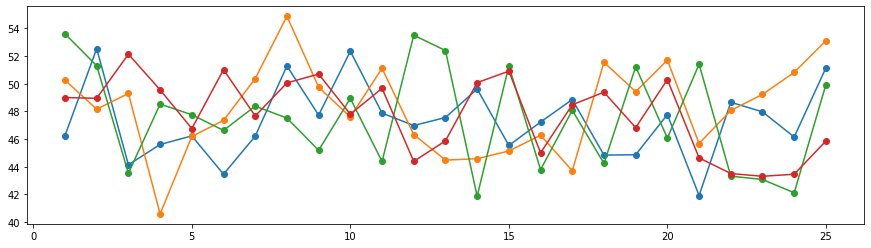

In [5]:
plt.figure(figsize=(15, 4))

for colname in ('m1', 'm2', 'm3', 'm4'):
    data_series = measurements_df[colname]
    plt.plot(data_series, 'o-')

In [6]:
measurements_df.mean()

m1    47.3124
m2    48.2272
m3    47.5244
m4    47.8148
dtype: float64

In [7]:
measurements_df.mean(axis=1)

1     49.7800
2     50.2375
3     47.2775
4     46.0725
5     46.7350
6     47.1150
7     48.1575
8     50.9375
9     48.3425
10    49.1725
11    48.2600
12    47.8025
13    47.5775
14    46.5375
15    48.2175
16    45.5775
17    47.2825
18    47.5050
19    48.0900
20    48.9625
21    45.9125
22    45.8900
23    45.8975
24    45.6375
25    50.0150
dtype: float64

In [8]:
measurements_df['xbar'] = measurements_df.mean(axis=1)
measurements_df['r'] = measurements_df.apply(lambda x: max(x) - min(x), axis=1)
measurements_df

,m1,m2,m3,m4,xbar,r
1,46.25,50.26,53.61,49.00,49.7800,7.36
2,52.54,48.16,51.30,48.95,50.2375,4.38
3,44.14,49.30,43.53,52.14,47.2775,8.61
4,45.61,40.59,48.53,49.56,46.0725,8.97
5,46.23,46.19,47.76,46.76,46.7350,1.57
6,43.46,47.35,46.63,51.02,47.1150,7.56
7,46.21,50.37,48.38,47.67,48.1575,4.16
8,51.29,54.88,47.52,50.06,50.9375,7.36
9,47.73,49.75,45.19,50.70,48.3425,5.51
10,52.35,47.60,48.94,47.80,49.1725,4.75


In [9]:
r_avg = measurements_df.r.mean()
x_avg = measurements_df.xbar.mean()

k = measurements_df.shape[0]
d3 = 0
d4 = 2.282
a2 = 0.729

In [10]:
UCL_R = d4 * r_avg
LCL_R = d3 * r_avg

UCL_X = x_avg + a2 * r_avg
LCL_X = x_avg - a2 * r_avg

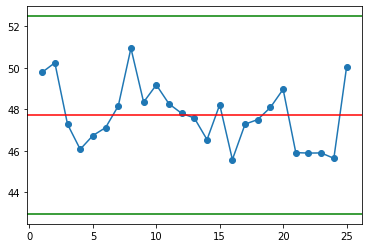

In [11]:
_ = plt.plot(measurements_df.xbar, 'o-')
_ = plt.axhline(x_avg, color='r')
_ = plt.axhline(UCL_X, color='g')
_ = plt.axhline(LCL_X, color='g')

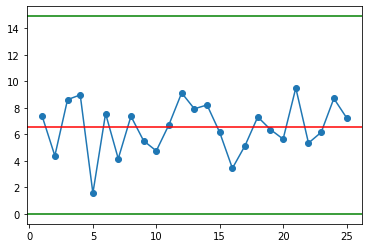

In [12]:
_ = plt.plot(measurements_df.r, 'o-')
_ = plt.axhline(r_avg, color='r')
_ = plt.axhline(UCL_R, color='g')
_ = plt.axhline(LCL_R, color='g')